In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

tag = 'HM-FSTP-RS'
cwd = os.path.dirname(os.getcwd())
outpath = os.path.join(cwd, 'Output', tag)

df_all = pd.read_csv(outpath + '/Features/Features_All.csv')

df_all.head()


,Unnamed: 0.1,Unnamed: 0,PatID,Fraction,Contour,ContourType,Feature,FeatureValue
0,0,0,1601,1,RP,Manual,shape_Elongation,0.847156
1,1,1,1601,1,RP,Manual,shape_Flatness,0.687529
2,2,2,1601,1,RP,Manual,shape_LeastAxisLength,20.722302
3,3,3,1601,1,RP,Manual,shape_MajorAxisLength,30.140250
4,4,4,1601,1,RP,Manual,shape_Maximum2DDiameterColumn,31.321124


In [9]:
df_signal = df_all.loc[df_all['Feature'] == 'firstorder_Median']
df_signal = df_signal[['PatID', 'Fraction', 'Contour', 'ContourType', 'Feature', 'FeatureValue']]
df_signal = df_signal.loc[df_signal['ContourType'] == 'Manual']
df_signal.head()


,PatID,Fraction,Contour,ContourType,Feature,FeatureValue
23,1601,1,RP,Manual,firstorder_Median,50.0
130,1601,2,RP,Manual,firstorder_Median,41.0
237,1601,3,RP,Manual,firstorder_Median,36.0
344,1601,4,RP,Manual,firstorder_Median,30.0
451,1601,5,RP,Manual,firstorder_Median,32.0


In [11]:
df_signal['BaseChange'] = 0

for pat in df_signal['PatID'].unique():
    df_pat = df_signal.loc[df_signal['PatID'] == pat]
    df_pat = df_pat.sort_values(by=['Fraction'])
    df_pat['BaseChange'] = (df_pat['FeatureValue'] - df_pat['FeatureValue'].values[0]) / df_pat['FeatureValue'].values[0]
    df_signal.loc[df_signal['PatID'] == pat, 'BaseChange'] = df_pat['BaseChange']

In [12]:


df_barsignal = df_signal.copy()

df_barsignal['BaseChange'] = df_barsignal['BaseChange'].abs()
df_barsignal = df_barsignal.groupby(['Fraction']).median()
df_barsignal = df_barsignal.reset_index()

df_barsignal['BaseChange'] = df_barsignal["BaseChange"] + 1

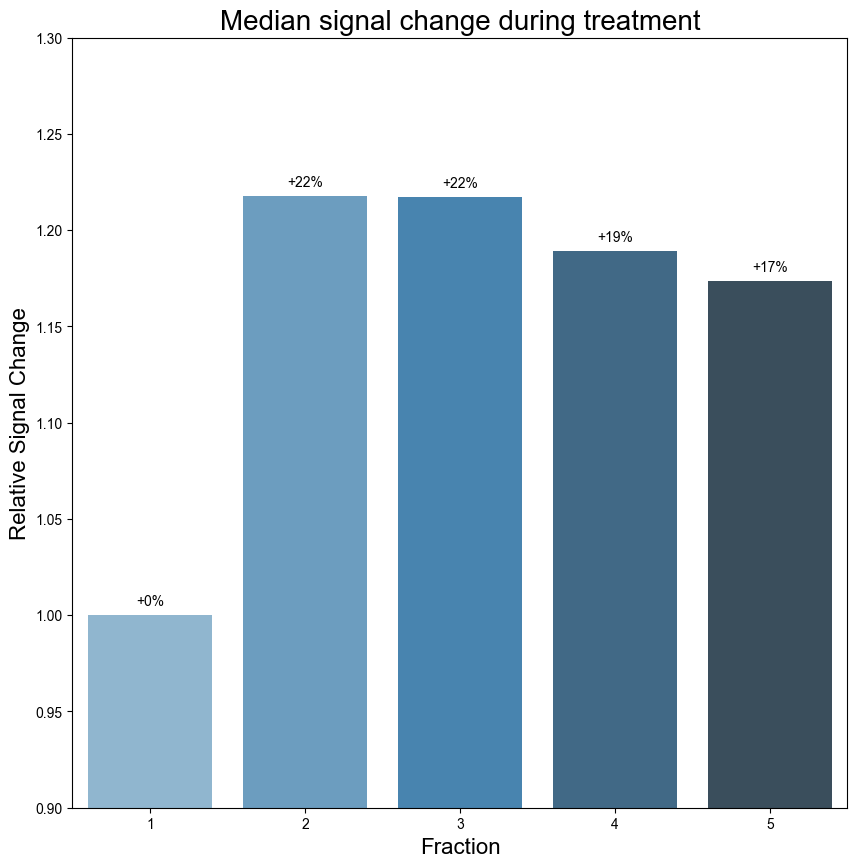

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Median signal change during treatment', fontsize=20)
ax.set_xlabel('Fraction', fontsize=16)
ax_set = ax.set(ylim=(0.9, 1.3))

sns.barplot(x='Fraction', y='BaseChange', palette = 'Blues_d', data=df_barsignal, ax=ax)
ax.set_ylabel('Relative Signal Change', fontsize=16)

# add labels to each bar plot in the graph
for p in ax.patches:
    ax.annotate('+' +format((p.get_height() - 1) * 100, '.0f') + '%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
# sns.despine()